**This is an example of finite differences**

Consider an equally space grid $x_j=x_0+hj$ where $h>0$.

In [1]:
x0=-1

-1

In [2]:
h=0.3

0.3

In [3]:
J=12

12

In [4]:
js=[1:J;]

12-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12

In [5]:
xs=x0.+h*js

12-element Array{Float64,1}:
 -0.7
 -0.4
 -0.10000000000000009
  0.19999999999999996
  0.5
  0.7999999999999998
  1.1
  1.4
  1.6999999999999997
  2.0
  2.3
  2.5999999999999996

Define $f_j=f(x_j)$ where
$$
    f(x)={1\over 1+x^2}.
$$

In [6]:
f(x)=1/(1+x^2)

f (generic function with 1 method)

In [7]:
fs=f.(xs)

12-element Array{Float64,1}:
 0.6711409395973155
 0.8620689655172413
 0.9900990099009901
 0.9615384615384615
 0.8
 0.6097560975609757
 0.45248868778280543
 0.33783783783783783
 0.25706940874035994
 0.2
 0.15898251192368842
 0.12886597938144334

In [8]:
using Plots

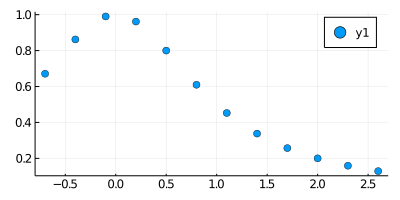

In [9]:
scatter(xs,fs,size=[400,200])

Create a table of finite differences such that
$$
   T_{j,k+1}=\Delta^k f_j
$$
for $k=0,\ldots,n$ and $j=1,\ldots,J-k$.

In [10]:
n=5

5

In [11]:
T=zeros(J,n+1);

In [12]:
T[:,1]=fs;

In [13]:
T

12×6 Array{Float64,2}:
 0.671141  0.0  0.0  0.0  0.0  0.0
 0.862069  0.0  0.0  0.0  0.0  0.0
 0.990099  0.0  0.0  0.0  0.0  0.0
 0.961538  0.0  0.0  0.0  0.0  0.0
 0.8       0.0  0.0  0.0  0.0  0.0
 0.609756  0.0  0.0  0.0  0.0  0.0
 0.452489  0.0  0.0  0.0  0.0  0.0
 0.337838  0.0  0.0  0.0  0.0  0.0
 0.257069  0.0  0.0  0.0  0.0  0.0
 0.2       0.0  0.0  0.0  0.0  0.0
 0.158983  0.0  0.0  0.0  0.0  0.0
 0.128866  0.0  0.0  0.0  0.0  0.0

In [14]:
for k=1:n
    for j=1:J-k
        T[j,k+1]=T[j+1,k]-T[j,k]
    end
end

Newton's forward difference formula for the interpolating polynomial is
$$
    f(x_j+\theta h)\approx\sum_{k=0}^n {\theta\choose k}\Delta^k f_j
$$

In [15]:
function fp(j,theta)
    global n
    r=0.0
    b=1.0
    for k=0:n
#        println("k=$k")
        r=r+b*T[j,k+1]
        b=b*(theta-k)/(k+1)
    end
    return r
end

fp (generic function with 1 method)

In [16]:
fp(2,-1)

0.7577457729408739

In [17]:
fs[1]

0.6711409395973155

In [18]:
p(x)=fp(1,(x-xs[1])/h)

p (generic function with 1 method)

In [19]:
xvals=[xs[1]:0.1:xs[7];];

In [20]:
yvals=p.(xvals);

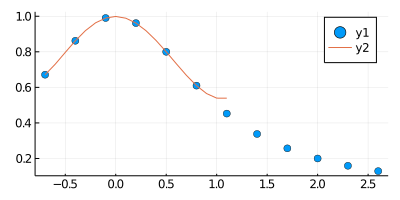

In [21]:
plot!(xvals,yvals)